<!-- TOC -->

- [7.Moving Beyond Linearity](#7moving-beyond-linearity)
    - [7.1 Polynomial Regression](#71-polynomial-regression)
    - [7.2 Step Functions](#72-step-functions)
    - [7.3 Basis Functions](#73-basis-functions)
    - [7.4 Regression Splines](#74-regression-splines)
        - [7.4.1 Piecewise Polynomials](#741-piecewise-polynomials)
        - [7.4.2 Constraints and Splines](#742-constraints-and-splines)
    - [7.5 Smoothing Splines](#75-smoothing-splines)
    - [7.6 Local Regression](#76-local-regression)
    - [7.7 Generalized Additive Models](#77-generalized-additive-models)
        - [7.7.1 GAMs for Regression Problems](#771-gams-for-regression-problems)
        - [7.7.2 GAMs for Classification Problems](#772-gams-for-classification-problems)
    - [7.8 Lab: Non-linear Modeling](#78-lab-non-linear-modeling)
        - [7.8.1 Polynomial Regression and Step Functions](#781-polynomial-regression-and-step-functions)
        - [7.8.2 Splines](#782-splines)
        - [7.8.3 GAMs](#783-gams)

<!-- /TOC -->

# 7.Moving Beyond Linearity
- **Polynomial regression** extends the linear model by adding extra predictors, obtained by raising each of the original predictors to a power. For example, a cubic regression uses three variables, X, $X^2$, and $X^3$, as predictors.
- **Step functions** cut the range of a variable into K distinct regions in order to produce a qualitative variable.
- **Regression splines** are more flexible than polynomials and step functions, and in fact are an extension of the two. They involve dividing the range of X into K distinct regions. Within each region, a polynomial function is fit to the data.
- **Smoothing splines** are similar to regression splines, but arise in a slightly different situation. Smoothing splines result from minimizing a residual sum of squares criterion subject to a smoothness penalty.
- **Local regression** is similar to splines, but differs in an important way. The regions are allowed to overlap, and indeed they do so in a very smooth way.
- **Generalized additive** models allow us to extend the methods above to deal with multiple predictors.

## 7.1 Polynomial Regression
$y_i=\beta_0+\beta_1x_i+\beta_2x_i^2+\beta_3x_i^3+\cdots+\beta_dx_i^d+\epsilon_i,\ (7.1)$

$Pr(y_i>250|x_i)=\frac{exp(\beta_0+\beta_1x_i+\beta_2x_i^2+\cdots+\beta_dx_i^d)}{1+exp(\beta_0+\beta_1x_i+\beta_2x_i^2+\cdots+\beta_dx_i^d)}.\ (7.3)$

![](http://ou8qjsj0m.bkt.clouddn.com//17-12-20/83853581.jpg)

## 7.2 Step Functions
Here we break the range of X into **bins**, and fit a different constant in each bin. This amounts to converting a continuous variable into an **ordered categorical variable**.

In greater detail, we create cutpoints c1, c2, . . . , cK in the range of X, and then construct K + 1 new variables

$C_0(X)=I(X<c_1),$

$C_1(X)=I(c_1 \le X < c_2),$

$C_2(X)=I(c_2 \le X < c_3),$

$\vdots$

$C_{K-1}(X)=I(c_{K-1} \le X < c_K),$

$C_K(X)=I(c_K \le X),\ (7.4)$

where I(·) is an **indicator function** that returns a 1 if the condition is true, and returns a 0 otherwise.

![](http://ou8qjsj0m.bkt.clouddn.com//17-12-20/19962193.jpg)

$Pr(y_i>250|x_i)=\frac{exp(\beta_0+\beta_1C_1(x_i)+\beta_2C_2(x_i)+\cdots+\beta_KC_K(x_i))}{1+exp(\beta_0+\beta_1C_1(x_i)+\beta_2C_2(x_i)+\cdots+\beta_KC_K(x_i))}.\ (7.6)$

## 7.3 Basis Functions
Polynomial and piecewise-constant regression models are in fact special cases of a basis function approach.

$y_i=\beta_0+\beta_1b_1(x_i)+\beta_2b_2(x_i)+\beta_3b_3(x_i)+\cdots+\beta_Kb_K(x_i)+\epsilon_i.\ (7.7)$

Note that the basis functions $b_1(\cdot),b_2(\cdot),\cdots,b_K(\cdot)$ are fixed and known. (In other words, we choose the functions ahead of time.) For polynomial regression, the basis functions are $b_j(x_i) = x_i^j$, and for piecewise constant functions they are $b_j(x_i) = I(c_j \le xi < c_{j+1})$.

## 7.4 Regression Splines
### 7.4.1 Piecewise Polynomials
$y_i=\beta_0+\beta_1x_i+\beta_2x_i^2+\beta_3x_i^3+\epsilon_i,\ (7.8)$

where the coefficients β0, β1, β2, and β3 differ in different parts of the range of X. The points where the coefficients change are called **knots**.

For example, a piecewise cubic with no knots is just a standard cubic polynomial, as in (7.1) with d = 3. A piecewise cubic polynomial with a single knot at a point c takes the form

$$
y_i=\left\{\begin{matrix}
 \beta_{01}+\beta_{11}x_i+\beta_{21}x_i^2+\beta_{31}x_i^3+\epsilon_i,& if\ x_i < c; \\ 
 \beta_{02}+\beta_{12}x_i+\beta_{22}x_i^2+\beta_{32}x_i^3+\epsilon_i, & if\ x_i \ge c.
\end{matrix}\right.
$$

### 7.4.2 Constraints and Splines
![](http://ou8qjsj0m.bkt.clouddn.com//17-12-21/75913391.jpg)

## 7.5 Smoothing Splines
In fitting a smooth curve to a set of data, what we really want to do is find some fun ction, say g(x), that fits the observed data well: that is, we want $RSS=\sum_{i=1}^n(y_i-g(x_i))^2$ to be small. What we really want is a function g that makes RSS small, but that is also **smooth**.

How might we ensure that g is smooth? There are a number of ways to do this. A natural approach is to find the function g that minimizes

$\sum_{i=1}^n(y_i-g(x_i))^2+\lambda \int g''(t)^2dt\ (7.11)$

where λ is a nonnegative **tuning parameter**. The function g that minimizes (7.11) is known as a **smoothing spline**.

## 7.6 Local Regression
**Local regression** is a different approach for fitting flexible non-linear functions, which involves computing the fit at a target point x0 using only the nearby training observations.

![](http://ou8qjsj0m.bkt.clouddn.com//17-12-25/66875750.jpg)

Local regression is sometimes referred to as a **memory-based** procedure, because like nearest-neighbors, we need all the training data each time we wish to compute a prediction.

Algorithm 7.1 Local Regression At $X = x_0$

1. Gather the fraction s = k/n of training points whose xi are closest to $x_0$.
2. Assign a weight $K_{i0} = K(x_i, x_0)$ to each point in this neighborhood, so that the point furthest from $x_0$ has weight zero, and the closest has the highest weight. All but these k nearest neighbors get weight zero.
3. Fit a **weighted least squares regression** of the $y_i$ on the $x_i$ using the aforementioned weights, by finding $\hat{\beta_0}$ and $\hat{\beta_1}$ that minimize $\sum_{i=1}^n K_{i0}(y_i-\beta_0-\beta_1x_i)^2.\ (7.14)$
4. The fitted value at $x_0$ is given by $\hat{f}(x_0) = \hat{\beta_0} + \hat{\beta_1}x_0$.

## 7.7 Generalized Additive Models
**Generalized additive models** (GAMs) provide a general framework for extending a standard linear model by allowing non-linear functions of each of the variables,while maintaining **additivity**.

### 7.7.1 GAMs for Regression Problems
A natural way to extend the multiple linear regression model

$y_i=\beta_0+\beta_1x_{i1}+\beta_2x_{i2}+\cdots+\beta_px_{ip}+\epsilon_i$

We would then write the model as

$y_i=\beta_0+f_1(x_{i1})+f_2(x_{i2})+\cdots+f_p(x_{ip})+\epsilon_i.\ (7.15)$

This is an example of a GAM. It is called an **additive** model because we calculate a separate fj for each Xj, and then add together all of their contributions.

### 7.7.2 GAMs for Classification Problems
Recall the logistic regression model (4.6):

$log(\frac{p(X)}{1-p(X)})=\beta_0+\beta_1X_1+\beta_2X_2+\cdots+\beta_pX_p.\ (7.17)$

This **logit** is the log of the odds of P(Y = 1|X) versus P(Y = 0|X), which (7.17) represents as a linear function of the predictors. A natural way to extend (7.17) to allow for non-linear relationships is to use the model

$log(\frac{p(X)}{1-p(X)})=\beta_0+f_1X_1+f_2X_2+\cdots+f_pX_p.\ (7.18)$

Equation 7.18 is a logistic regression GAM.

## 7.8 Lab: Non-linear Modeling

In [1]:
library(ISLR)
attach(Wage)

### 7.8.1 Polynomial Regression and Step Functions
This syntax fits a linear model, using the lm() function, in order to predict wage using a fourth-degree polynomial in age: poly(age,4).

The function returns a matrix whose columns are a basis of orthogonal polynomials, which essentially means that each column is a linear orthogonal combination of the variables age, age^2, age^3 and age^4.

In [2]:
fit=lm(wage~poly(age,4),data=Wage)
coef(summary(fit))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.70361,0.7287409,153.283015,0.000000e+00
"poly(age, 4)1",447.06785,39.9147851,11.200558,1.484604e-28
"poly(age, 4)2",-478.31581,39.9147851,-11.983424,2.355831e-32
"poly(age, 4)3",125.52169,39.9147851,3.144742,1.678622e-03
"poly(age, 4)4",-77.91118,39.9147851,-1.951938,5.103865e-02


However, we can also use poly() to obtain age, age^2, age^3 and age^4 directly, if we prefer. We can do this by using the raw=TRUE argument to the poly() function.

In [3]:
fit2=lm(wage~poly(age,4,raw=T),data=Wage)
coef(summary(fit2))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.841542e+02,6.004038e+01,-3.067172,0.0021802539
"poly(age, 4, raw = T)1",2.124552e+01,5.886748e+00,3.609042,0.0003123618
"poly(age, 4, raw = T)2",-5.638593e-01,2.061083e-01,-2.735743,0.0062606446
"poly(age, 4, raw = T)3",6.810688e-03,3.065931e-03,2.221409,0.0263977518
"poly(age, 4, raw = T)4",-3.203830e-05,1.641359e-05,-1.951938,0.0510386498


There are several other equivalent ways of fitting this model, which showcase the flexibility of the formula language in R.

In [4]:
fit2a=lm(wage~age+I(age^2)+I(age^3)+I(age^4),data=Wage)
coef(fit2a)

(Intercept)           age      I(age^2)      I(age^3)      I(age^4) 
-1.841542e+02  2.124552e+01 -5.638593e-01  6.810688e-03 -3.203830e-05

In [8]:
fit2b=lm(wage~cbind(age,age^2,age^3,age^4),data=Wage)

This does the same more compactly, using the cbind() function for building a matrix from a collection of vectors; any function call such as cbind() inside a formula also serves as a wrapper.

We now create a grid of values for age at which we want predictions, and then call the generic predict() function, specifying that we want standard errors as well.

In [5]:
agelims=range(age)
age.grid=seq(from=agelims[1],to=agelims[2])
preds=predict(fit,newdata=list(age=age.grid),se=TRUE)
se.bands=cbind(preds$fit+2*preds$se.fit,preds$fit-2*preds$se.fit)

Finally, we plot the data and add the fit from the degree-4 polynomial.

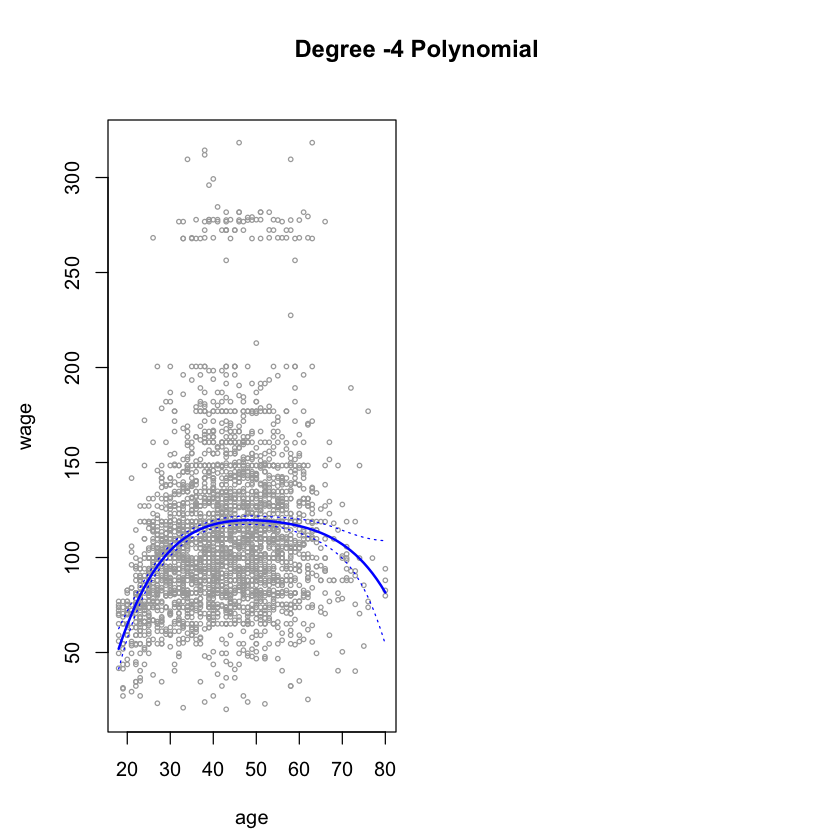

In [6]:
par(mfrow=c(1,2),mar=c(4.5,4.5,1,1) ,oma=c(0,0,4,0))
plot(age,wage,xlim=agelims ,cex=.5,col="darkgrey")
title("Degree -4 Polynomial ",outer=T)
lines(age.grid,preds$fit,lwd=2,col="blue")
matlines(age.grid,se.bands,lwd=1,col="blue",lty=3)

In [7]:
preds2=predict(fit2,newdata=list(age=age.grid),se=TRUE)
max(abs(preds$fit -preds2$fit ))

[1] 7.81597e-11

We now fit models ranging from linear to a degree-5 polynomial and seek to determine the simplest model which is sufficient to explain the relationship between wage and age. We use the anova() function, which performs an analysis of variance (ANOVA, using an F-test) in order to test the null hypothesis that a model M1 is sufficient to explain the data against the alternative hypothesis that a more complex model M2 is required. In order to use the anova() function, M1 and M2 must be nested models: the predictors in M1 must be a subset of the predictors in M2. In this case, we fit five different models and sequentially compare the simpler model to the more complex model.

In [9]:
fit.1=lm(wage~age,data=Wage)
fit.2=lm(wage~poly(age,2),data=Wage)
fit.3=lm(wage~poly(age,3),data=Wage)
fit.4=lm(wage~poly(age,4),data=Wage)
fit.5=lm(wage~poly(age,5),data=Wage)
anova(fit.1,fit.2,fit.3,fit.4,fit.5)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2998,5022216,NA,NA,NA,NA
2997,4793430,1,228786.010,143.5931074,2.367734e-32
2996,4777674,1,15755.694,9.8887559,1.679213e-03
2995,4771604,1,6070.152,3.8098134,5.104623e-02
2994,4770322,1,1282.563,0.8049758,3.696820e-01


The p-value comparing the linear Model 1 to the quadratic Model 2 is essentially zero (<10−15), indicating that a linear fit is not sufficient. Similarly the p-value comparing the quadratic Model 2 to the cubic Model 3 is very low (0.0017), so the quadratic fit is also insufficient. The p-value comparing the cubic and degree-4 polynomials, Model 3 and Model 4, is approximately 5 % while the degree-5 polynomial Model 5 seems unnecessary because its p-value is 0.37. Hence, either a cubic or a quartic polynomial appear to provide a reasonable fit to the data, but lower- or higher-order models are not justified.

In this case, instead of using the anova() function, we could have obtained these p-values more succinctly by exploiting the fact that poly() creates orthogonal polynomials.

In [10]:
coef(summary(fit.5))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),111.70361,0.7287647,153.2780243,0.000000e+00
"poly(age, 5)1",447.06785,39.9160847,11.2001930,1.491111e-28
"poly(age, 5)2",-478.31581,39.9160847,-11.9830341,2.367734e-32
"poly(age, 5)3",125.52169,39.9160847,3.1446392,1.679213e-03
"poly(age, 5)4",-77.91118,39.9160847,-1.9518743,5.104623e-02
"poly(age, 5)5",-35.81289,39.9160847,-0.8972045,3.696820e-01


Notice that the p-values are the same, and in fact the square of the t-statistics are equal to the F-statistics from the anova() function; for example:

In [11]:
(-11.983)^2

[1] 143.5923

However, the ANOVA method works whether or not we used orthogonal polynomials; it also works when we have other terms in the model as well. For example, we can use anova() to compare these three models:

In [12]:
fit.1=lm(wage~education+age,data=Wage)
fit.2=lm(wage~education+poly(age,2),data=Wage)
fit.3=lm(wage~education+poly(age,3),data=Wage)
anova(fit.1,fit.2,fit.3)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
2994,3867992,NA,NA,NA,NA
2993,3725395,1,142597.10,114.696898,2.728971e-26
2992,3719809,1,5586.66,4.493588,3.410431e-02


Next we consider the task of predicting whether an individual earns more than $250,000 per year. We proceed much as before, except that first we create the appropriate response vector, and then apply the **glm()** function using **family="binomial"** in order to fit a polynomial logistic regression model.

In [14]:
fit=glm(I(wage>250)~poly(age,4),data=Wage,family=binomial)
preds=predict(fit,newdata=list(age=age.grid),se=T)

The default prediction type for a glm() model is type="link", which is what we use here. This means we get predictions for the **logit**: that is, we have fit a model of the form

$log(\frac{Pr(Y=1|X)}{1-Pr(Y=1|X)})=X\beta$

and the predictions given are of the form $X\hat{\beta}$. The standard errors given are also of this form. In order to obtain confidence intervals for Pr(Y = 1|X), we use the transformation

$Pr(Y=1|X)=\frac{exp(X\beta)}{1+exp(X\beta)}.$

In [16]:
pfit=exp(preds$fit )/(1+exp(preds$fit))
se.bands.logit = cbind(preds$fit+2*preds$se.fit, preds$fit-2*preds$se.fit)
se.bands = exp(se.bands.logit)/(1+exp(se.bands.logit))

Note that we could have directly computed the probabilities by selecting the type="response" option in the predict() function.

In [17]:
preds=predict(fit,newdata=list(age=age.grid),type="response", se=T)

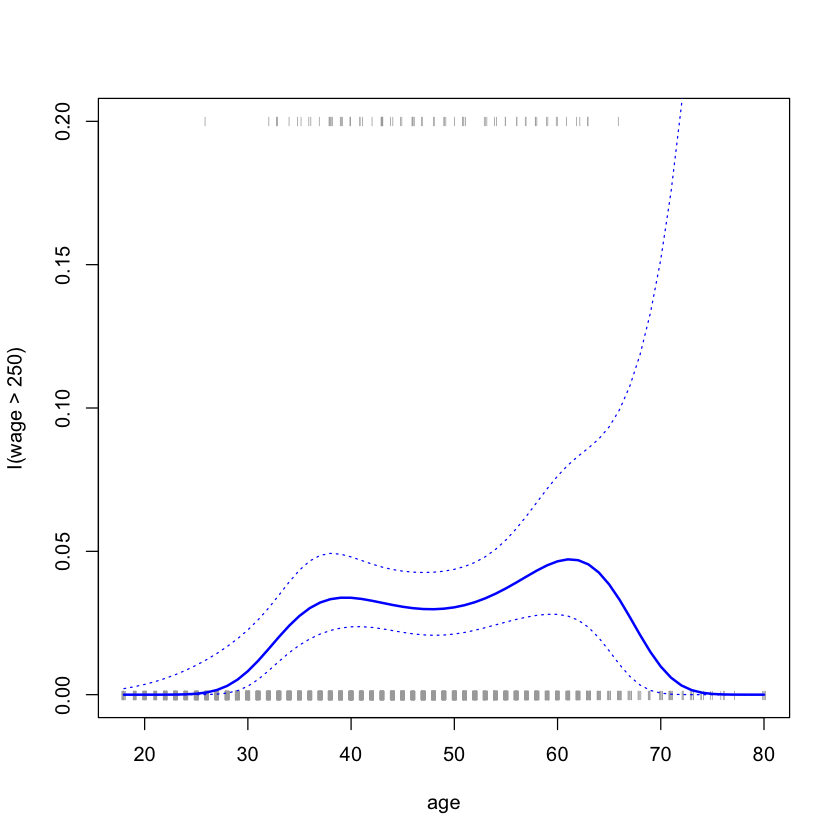

In [18]:
plot(age,I(wage>250),xlim=agelims ,type="n",ylim=c(0,.2))
points(jitter(age), I((wage>250)/5),cex=.5,pch="|",col ="darkgrey")
lines(age.grid,pfit,lwd=2, col="blue")
matlines(age.grid,se.bands,lwd=1,col="blue",lty=3)

We used the **jitter()** function to jitter the age values a bit so that observations with the same age value do not cover each other up. This is often called a **rug plot**.

In order to fit a step function, as discussed in Section 7.2, we use the **cut()** function.

In [19]:
table(cut(age,4))


(17.9,33.5]   (33.5,49]   (49,64.5] (64.5,80.1] 
        750        1399         779          72 

In [20]:
fit=lm(wage~cut(age ,4),data=Wage)
coef(summary(fit))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),94.158392,1.476069,63.789970,0.000000e+00
"cut(age, 4)(33.5,49]",24.053491,1.829431,13.148074,1.982315e-38
"cut(age, 4)(49,64.5]",23.664559,2.067958,11.443444,1.040750e-29
"cut(age, 4)(64.5,80.1]",7.640592,4.987424,1.531972,1.256350e-01


### 7.8.2 Splines
Fitting wage to age using a regression spline is simple:

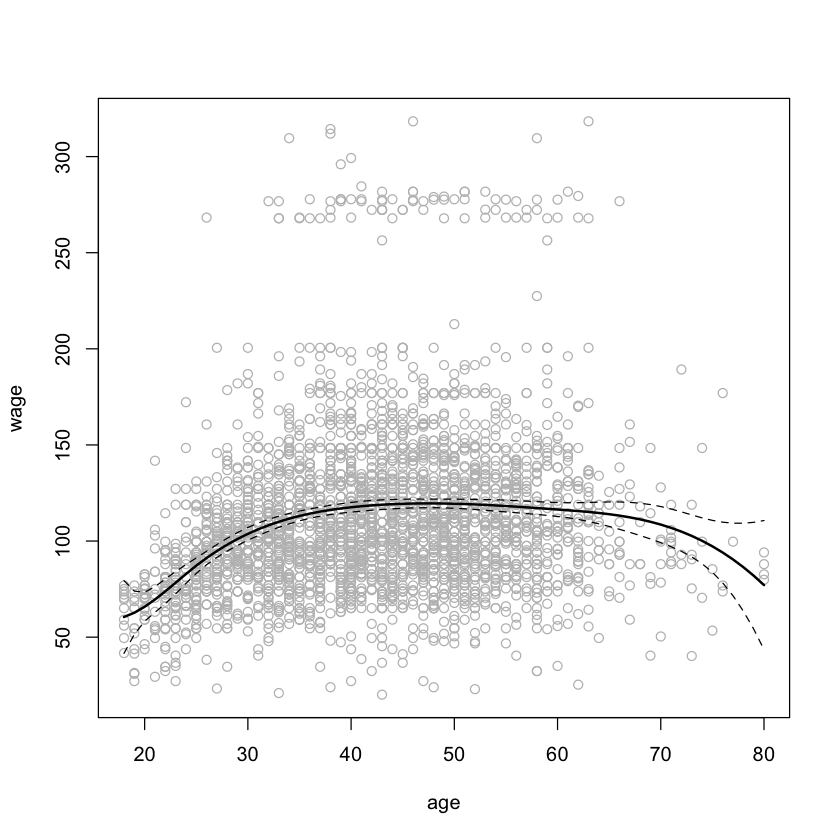

In [22]:
library(splines)
fit=lm(wage~bs(age,knots=c(25,40,60)),data=Wage)
pred=predict(fit,newdata=list(age=age.grid),se=T)
plot(age,wage,col="gray")
lines(age.grid,pred$fit,lwd=2)
lines(age.grid,pred$fit+2*pred$se ,lty="dashed")
lines(age.grid,pred$fit-2*pred$se ,lty="dashed")

The **bs()** function generates the entire matrix of basis functions for splines with the specified set of knots.

We could also use the df option to produce a spline with knots at uniform quantiles of the data.

In [23]:
dim(bs(age,knots=c(25,40,60)))

[1] 3000    6

In [24]:
dim(bs(age,df=6))

[1] 3000    6

In [25]:
attr(bs(age,df=6),"knots")

25%   50%   75% 
33.75 42.00 51.00

In order to instead fit a natural spline, we use the **ns()** function. Here ns() we fit a natural spline with four degrees of freedom.

In [28]:
fit2=lm(wage~ns(age,df=4),data=Wage)
pred2=predict(fit2,newdata=list(age=age.grid),se=T)

In order to fit a smoothing spline, we use the **smooth.spline()** function.

Warning message in smooth.spline(age, wage, cv = TRUE):
“cross-validation with non-unique 'x' values seems doubtful”

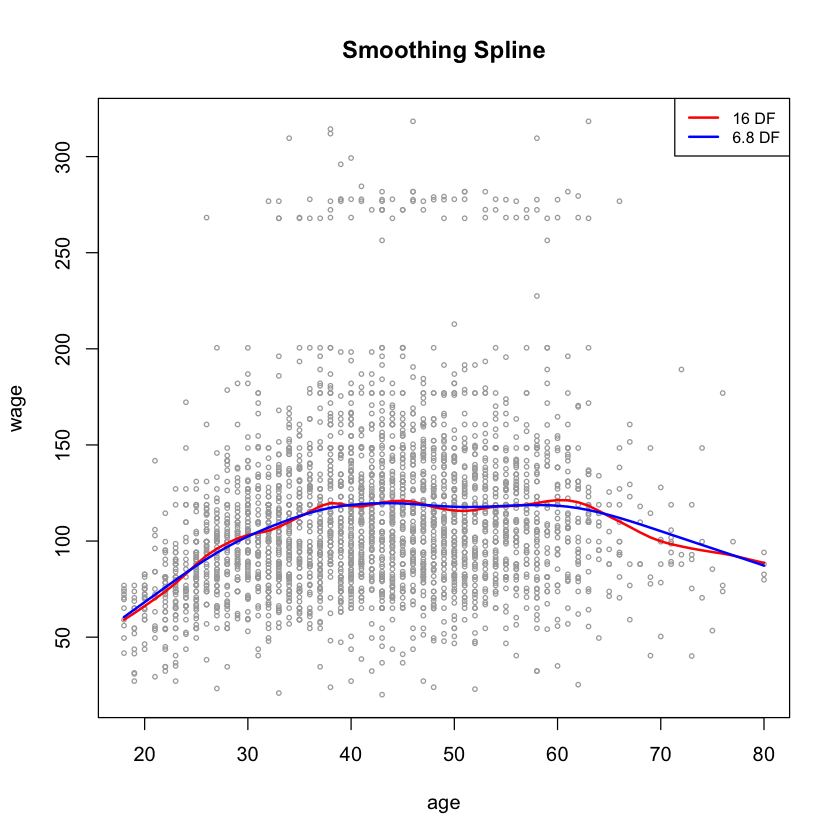

In [27]:
plot(age,wage,xlim=agelims ,cex=.5,col="darkgrey")
title (" Smoothing Spline ")
fit=smooth.spline(age,wage,df=16)
fit2=smooth.spline(age,wage,cv=TRUE)
lines(fit,col="red",lwd=2)
lines(fit2,col="blue",lwd=2)
legend("topright",legend=c("16 DF","6.8 DF"), col=c("red","blue"),lty=1,lwd=2,cex=.8)

In order to perform local regression, we use the loess() function.

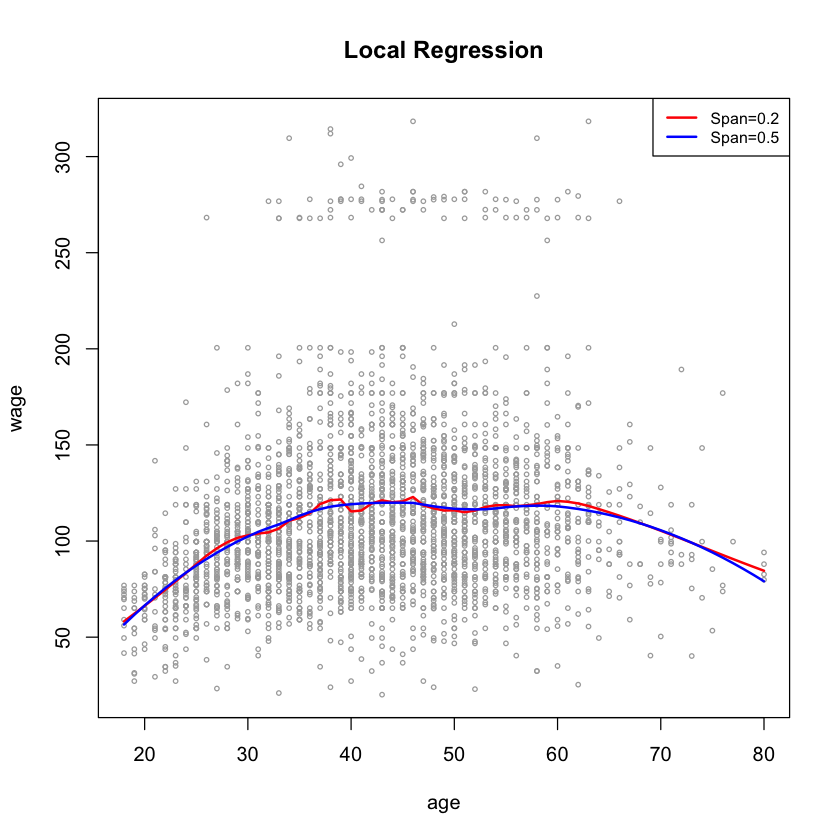

In [29]:
plot(age,wage,xlim=agelims ,cex=.5,col="darkgrey")
title (" Local Regression ")
fit=loess(wage~age,span=.2,data=Wage)
fit2=loess(wage~age,span=.5,data=Wage)
lines(age.grid,predict(fit,data.frame(age=age.grid)),col="red",lwd=2)
lines(age.grid,predict(fit2,data.frame(age=age.grid)), col="blue",lwd=2)
legend("topright",legend=c("Span=0.2","Span=0.5"), col=c("red","blue"),lty=1,lwd=2,cex=.8)

### 7.8.3 GAMs
Since this is just a big linear regression model using an appropriate choice of basis functions, we can simply do this using the lm() function.

In [30]:
gam1=lm(wage~ns(year ,4)+ns(age ,5)+education ,data=Wage)

The **s()** function, which is part of the gam library, is used to indicate that s() we would like to use a smoothing spline.

We use the **gam()** function in order to fit a GAM using these components. All of the terms in (7.16) are fit simultaneously, taking each other into account to explain the response.

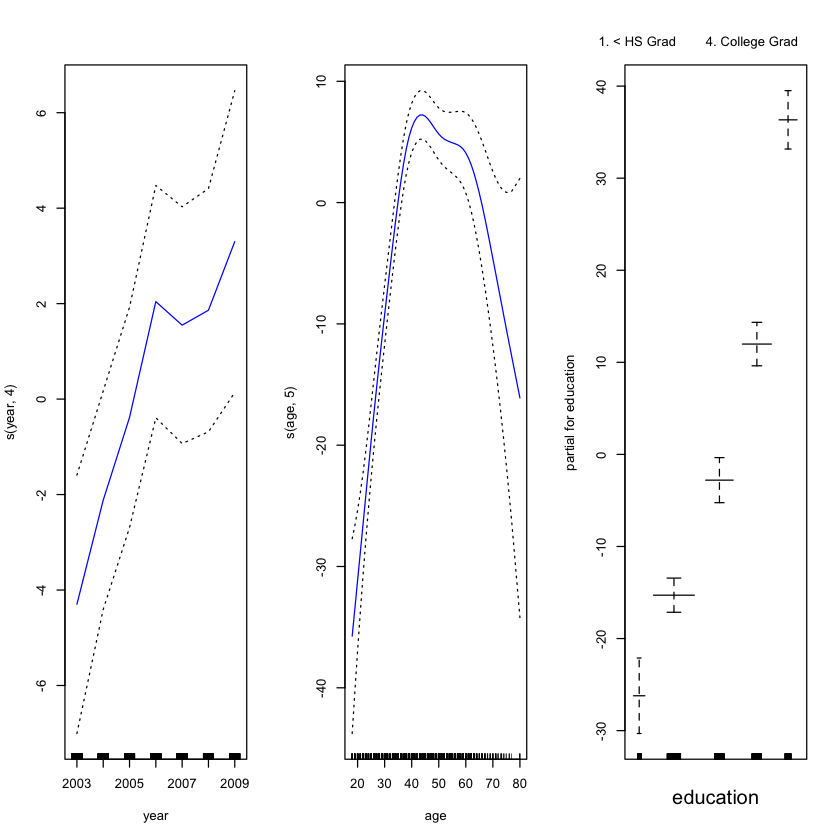

In [33]:
library(gam)
gam.m3=gam(wage~s(year,4)+s(age,5)+education ,data=Wage)

par(mfrow=c(1,3))
plot(gam.m3, se=TRUE,col="blue")

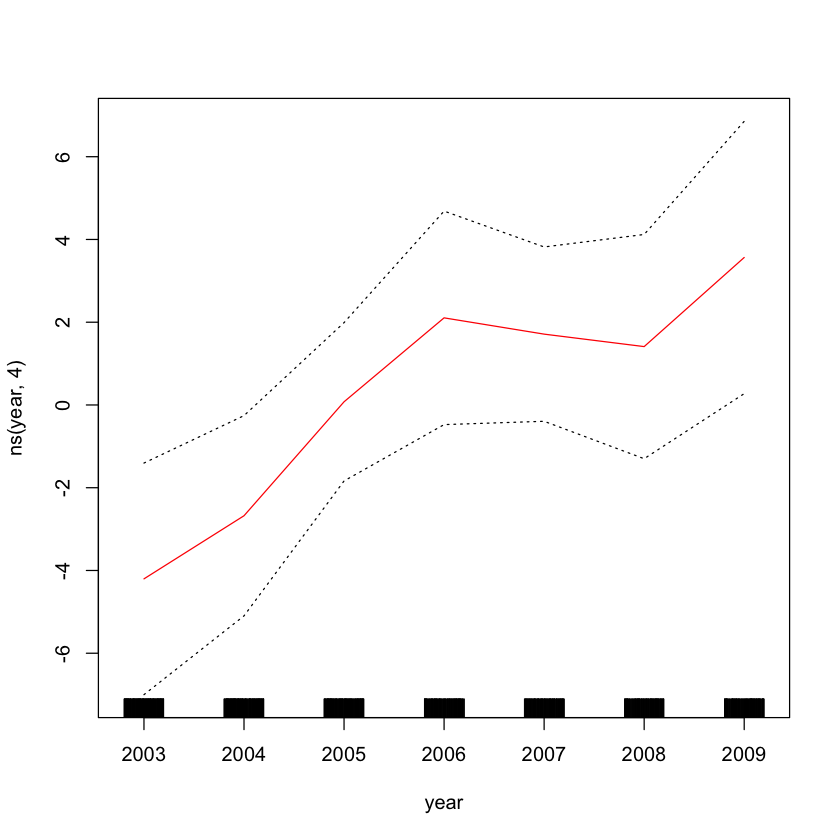

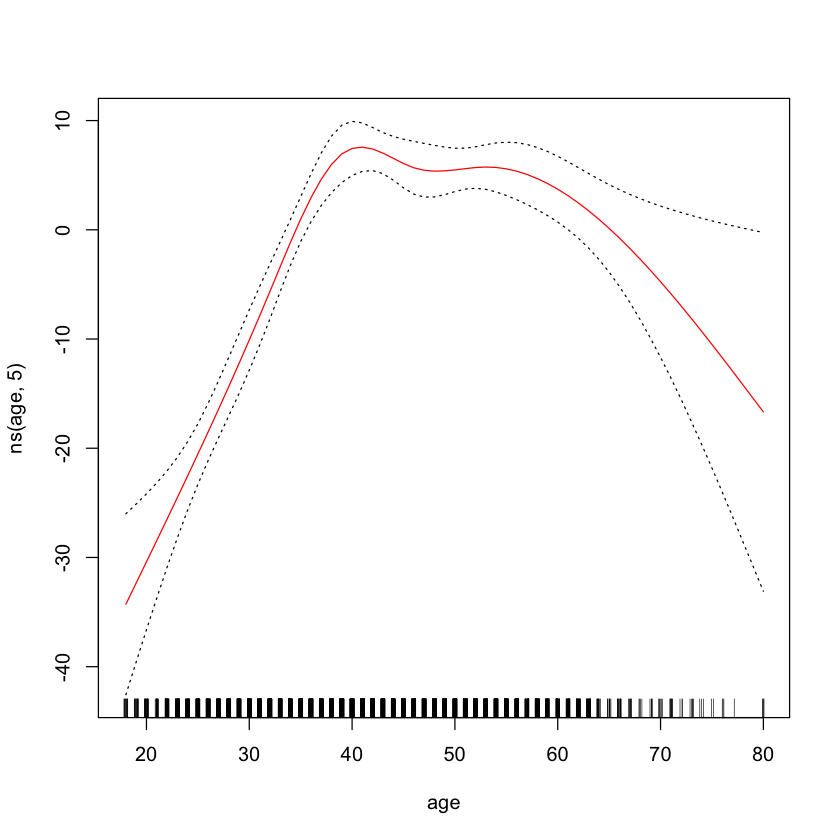

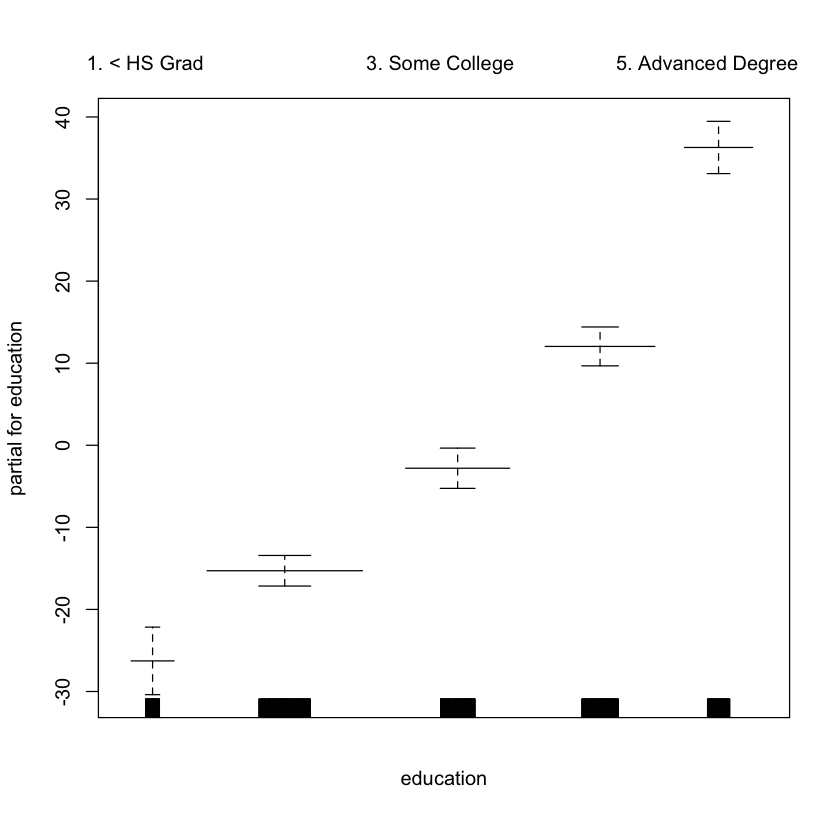

In [34]:
plot.gam(gam1, se=TRUE, col="red")

In these plots, the function of year looks rather linear. We can perform a series of ANOVA tests in order to determine which of these three models is best: a GAM that excludes year (M1), a GAM that uses a linear function of year (M2), or a GAM that uses a spline function of year (M3).

In [35]:
gam.m1=gam(wage~s(age ,5)+education ,data=Wage)
gam.m2=gam(wage~year+s(age ,5)+education ,data=Wage)
anova(gam.m1,gam.m2,gam.m3,test="F")

Resid. Df,Resid. Dev,Df,Deviance,F,Pr(>F)
2990,3711731,NA,NA,NA,NA
2989,3693842,1.000000,17889.243,14.477130,0.0001447167
2986,3689770,2.999989,4071.134,1.098212,0.3485661430


We find that there is compelling evidence that a GAM with a linear func- tion of year is better than a GAM that does not include year at all (p-value = 0.00014). However, there is no evidence that a non-linear function of year is needed (p-value = 0.349). In other words, based on the results of this ANOVA, M2 is preferred.

In [36]:
summary(gam.m3)


Call: gam(formula = wage ~ s(year, 4) + s(age, 5) + education, data = Wage)
Deviance Residuals:
    Min      1Q  Median      3Q     Max 
-119.43  -19.70   -3.33   14.17  213.48 

(Dispersion Parameter for gaussian family taken to be 1235.69)

    Null Deviance: 5222086 on 2999 degrees of freedom
Residual Deviance: 3689770 on 2986 degrees of freedom
AIC: 29887.75 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
             Df  Sum Sq Mean Sq F value    Pr(>F)    
s(year, 4)    1   27162   27162  21.981 2.877e-06 ***
s(age, 5)     1  195338  195338 158.081 < 2.2e-16 ***
education     4 1069726  267432 216.423 < 2.2e-16 ***
Residuals  2986 3689770    1236                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Anova for Nonparametric Effects
            Npar Df Npar F  Pr(F)    
(Intercept)                          
s(year, 4)        3  1.086 0.3537    
s(age, 5)         4 32.380 <2e-16 ***
education                            
---

We can make predictions from gam objects, just like from lm objects, using the predict() method for the class gam.

In [37]:
preds=predict(gam.m2,newdata=Wage)

We can also use local regression fits as building blocks in a GAM, using the lo() function.

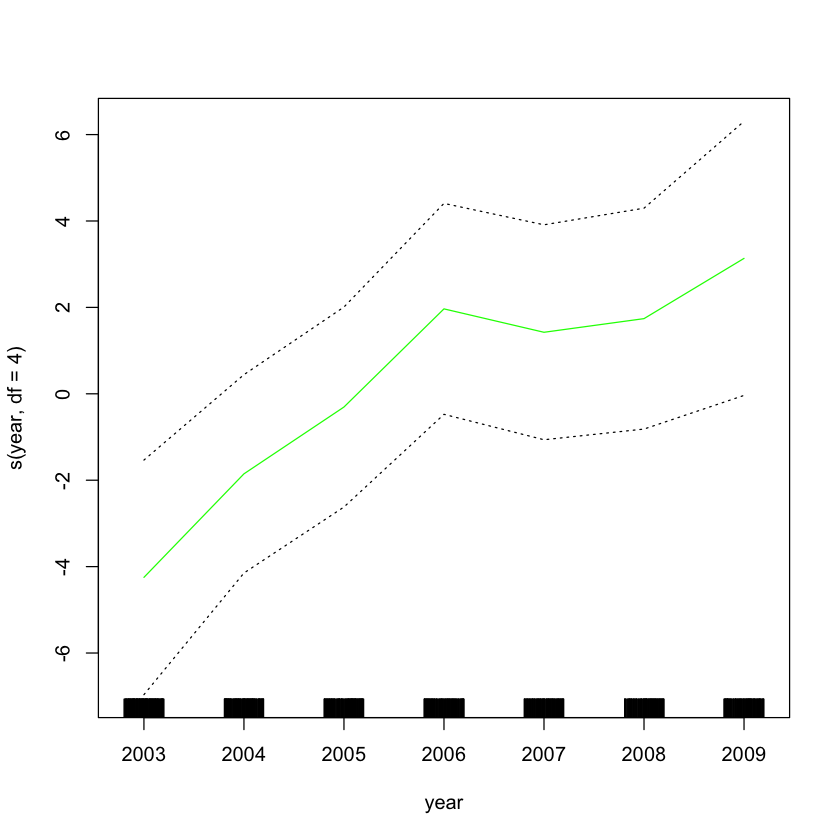

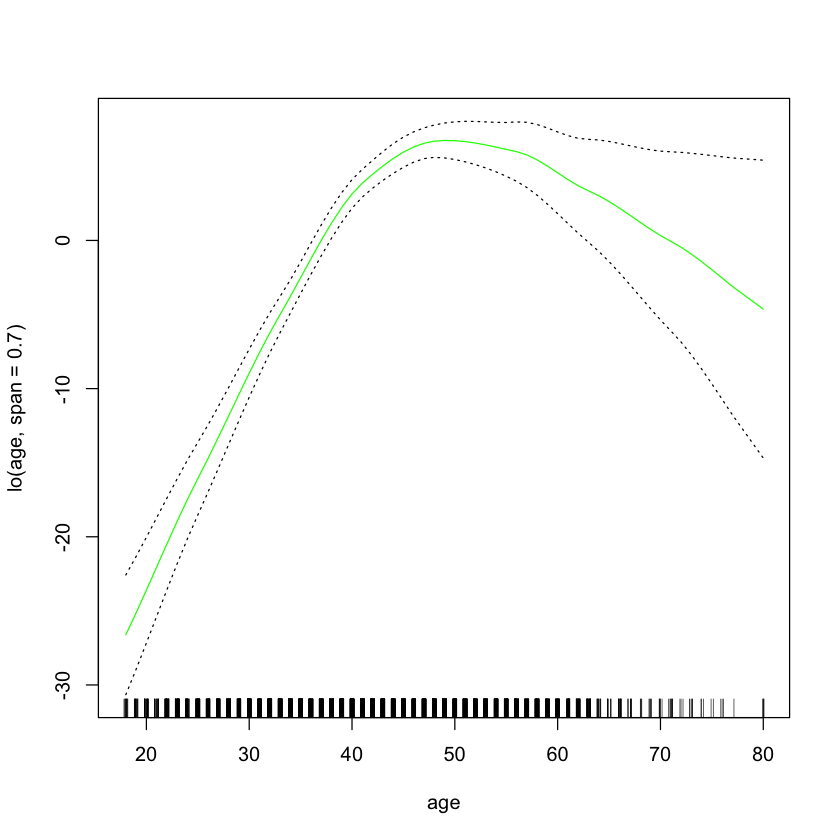

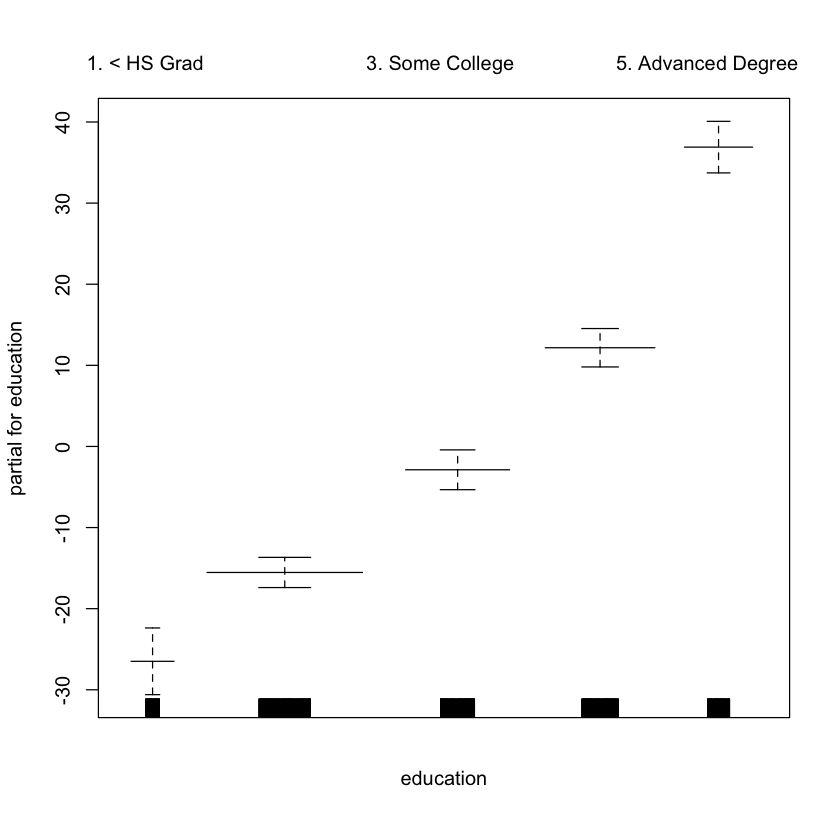

In [38]:
gam.lo=gam(wage~s(year,df=4)+lo(age,span=0.7)+education, data=Wage)
plot.gam(gam.lo, se=TRUE, col="green")

We can also use the lo() function to create interactions before calling the gam() function.

In [40]:
gam.lo.i=gam(wage~lo(year,age,span=0.5)+education, data=Wage)

Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“liv too small.    (Discovered by lowesd)”Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“lv too small.     (Discovered by lowesd)”Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“liv too small.    (Discovered by lowesd)”Warning message in lo.wam(x, z, wz, fit$smooth, which, fit$smooth.frame, bf.maxit, :
“lv too small.     (Discovered by lowesd)”

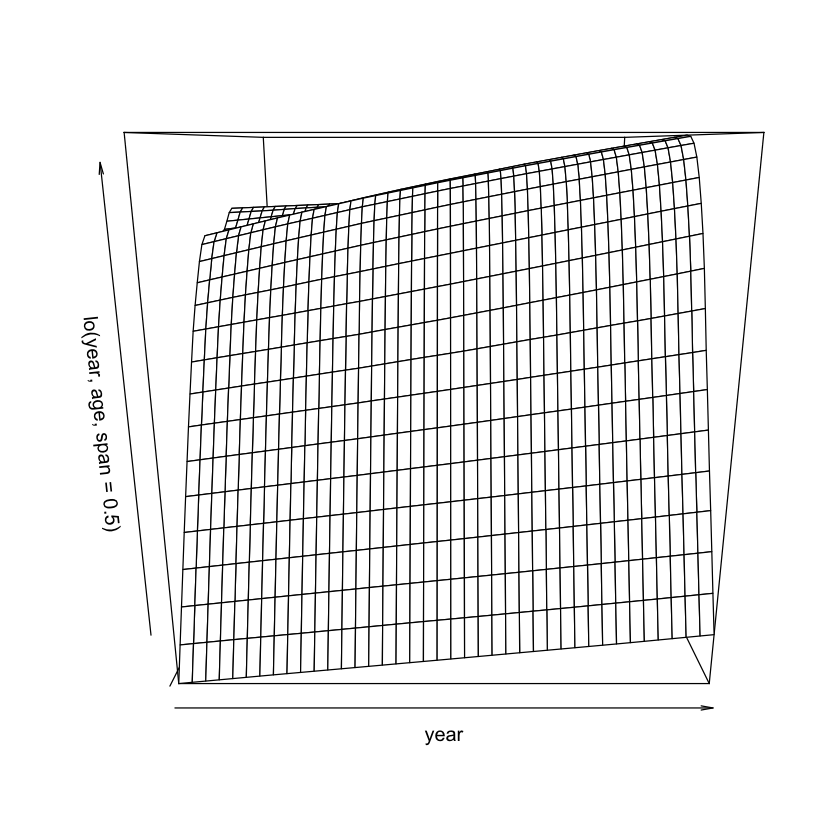

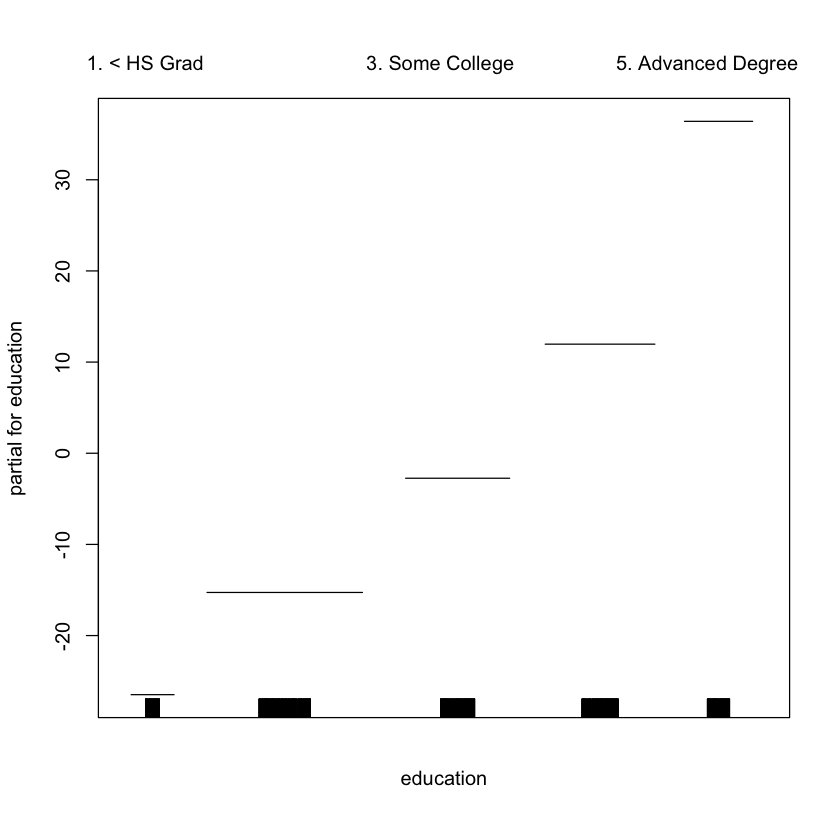

In [41]:
library(akima)
plot(gam.lo.i)

In order to fit a logistic regression GAM, we once again use the I() function in constructing the binary response variable, and set family=binomial.

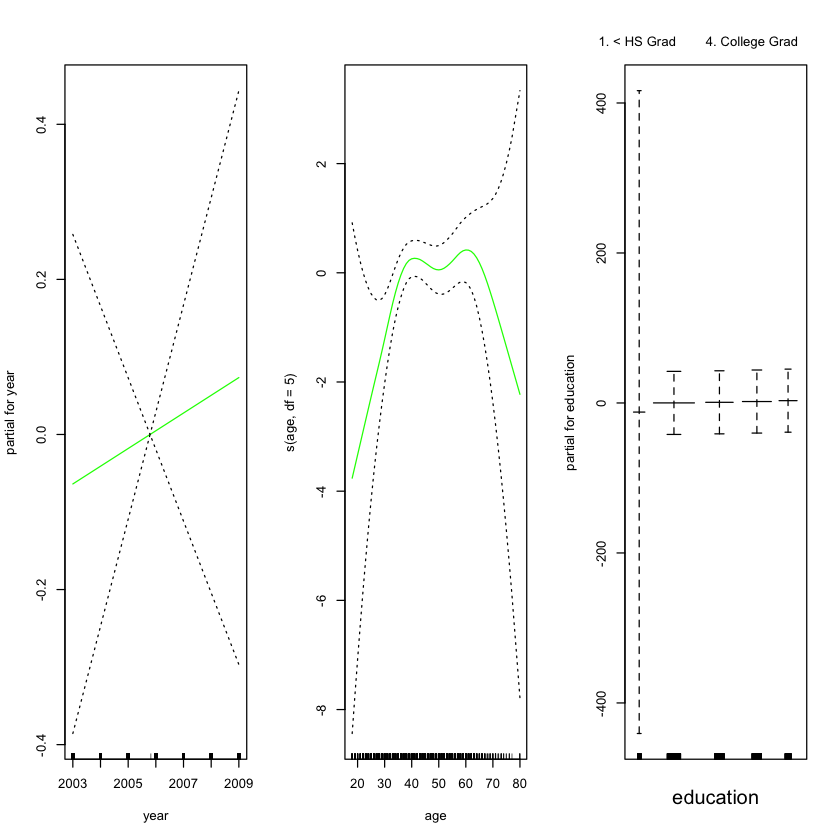

In [42]:
gam.lr=gam(I(wage>250)~year+s(age,df=5)+education, family=binomial,data=Wage)
par(mfrow=c(1,3))
plot(gam.lr,se=T,col="green")

It is easy to see that there are no high earners in the <HS category:

In [43]:
table(education ,I(wage >250))

                    
education            FALSE TRUE
  1. < HS Grad         268    0
  2. HS Grad           966    5
  3. Some College      643    7
  4. College Grad      663   22
  5. Advanced Degree   381   45

Hence, we fit a logistic regression GAM using all but this category. This provides more sensible results.

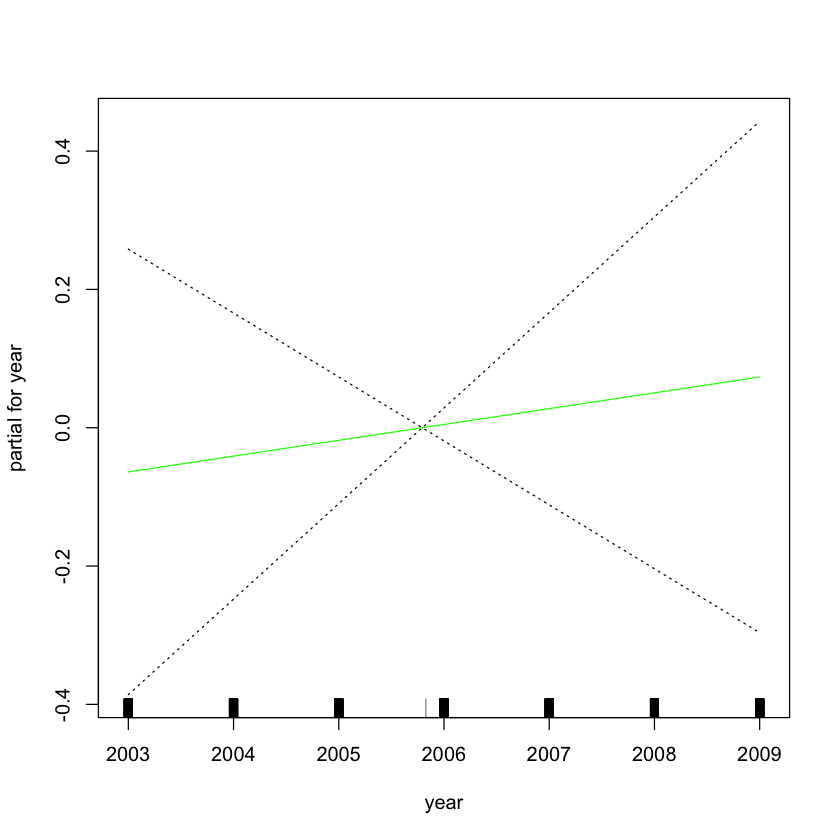

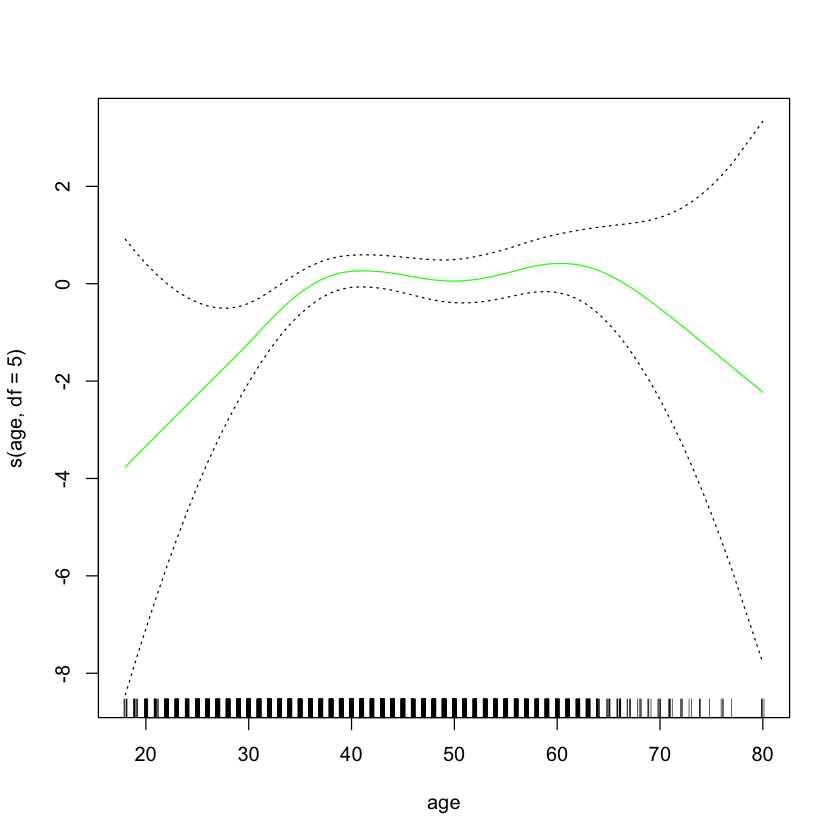

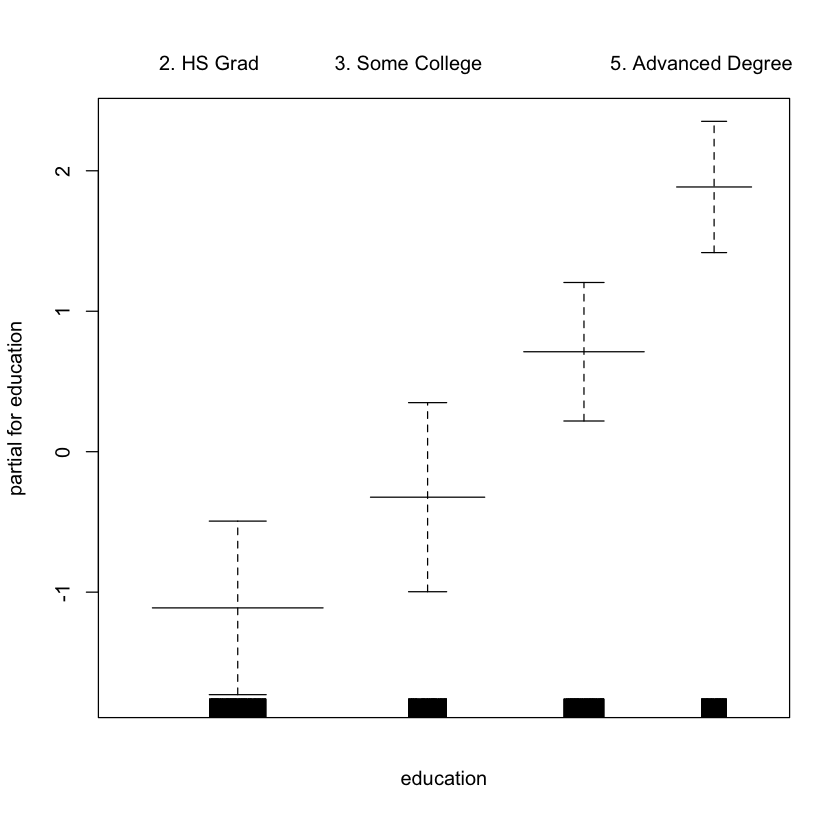

In [44]:
gam.lr.s=gam(I(wage>250)~year+s(age,df=5)+education,family= binomial,data=Wage,subset=(education!="1. < HS Grad"))
plot(gam.lr.s,se=T,col="green")